In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

In [8]:
fs_df = pd.read_pickle('../data/fs_df.pkl')
cs5_df = pd.read_pickle('../data/cs5_df.pkl')
cs6_df = pd.read_pickle('../data/cs6_df.pkl')

In [3]:
def get_delta(row):
    days, hms = row.split('-') if '-' in row else [0, row]
    hours, minutes, seconds = hms.split(':')
    return timedelta(days=int(days), seconds=int(seconds), minutes=int(minutes), hours=int(hours))
fs_df['REQTIME'] = fs_df['REQTIME'].apply(get_delta)
fs_df['USEDTIME'] = fs_df['USEDTIME'].apply(get_delta)

In [4]:
# timedelta(seconds=fs_df['REQTIME'].dt.total_seconds().sum())

In [5]:
over_req_df = fs_df[['REQTIME','USEDTIME']]

In [6]:
over_req_df.describe()

,REQTIME,USEDTIME
count,7395234,7395234
mean,0 days 22:18:34.809081092,0 days 03:48:04.106315094
std,1 days 14:41:07.890959117,0 days 12:44:52.118592948
min,0 days 00:01:00,0 days 00:00:00
25%,0 days 01:30:00,0 days 00:02:37
50%,0 days 08:00:00,0 days 00:13:54
75%,1 days 00:00:00,0 days 01:28:10
max,41 days 16:00:00,34 days 23:15:05


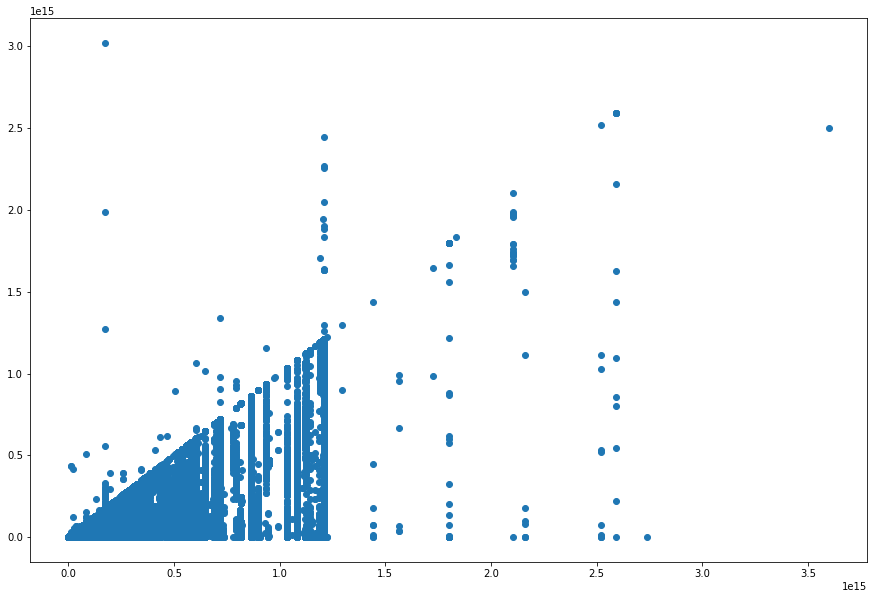

In [7]:
plt.figure(figsize=(15, 10))
plt.scatter(over_req_df['REQTIME'], over_req_df['USEDTIME'])

In [10]:
over_req_df = fs_df[['REQMEM','USEDMEM']]
over_req_df.describe()

,REQMEM,USEDMEM
count,7.395234e+06,7.395234e+06
mean,1.238999e+04,2.640906e+03
std,2.607385e+04,8.837158e+03
min,1.000000e+00,0.000000e+00
25%,2.048000e+03,1.389200e+02
50%,4.096000e+03,3.759500e+02
75%,1.400000e+04,1.825060e+03
max,1.026375e+06,9.925798e+05


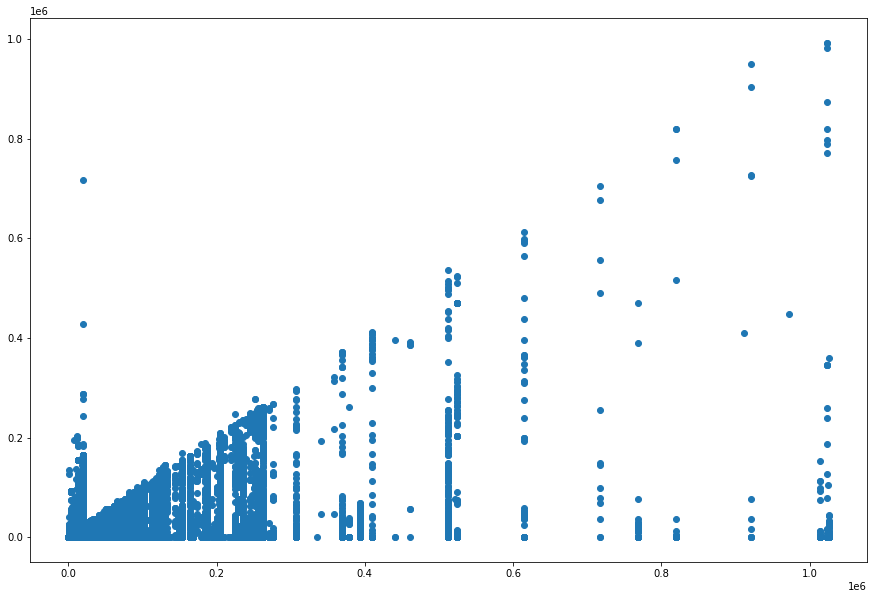

In [11]:
plt.figure(figsize=(15, 10))
plt.scatter(over_req_df['REQMEM'], over_req_df['USEDMEM'])